In [22]:
!pip install shap

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/suchy1713/expected_goals/master/data.csv')
X = df.drop(['is_goal'], axis=1)
y = df['is_goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

import xgboost as xgb

brain = xgb.XGBClassifier(max_depth=5, min_child_weight=5, subsample=0.56, colsample_bytree=0.72, learning_rate=0.214, n_estimators=200)
brain.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.72, gamma=0,
              learning_rate=0.214, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.56, verbosity=1)

In [0]:
import shap

class ShapWrapper(object):
    def __init__(self, X_test, model, explainer_class=shap.TreeExplainer):
        self.explainer = explainer_class(model)
        self.X_test = X_test
        self.shap_values = self.explainer.shap_values(X_test)
        self.expected_value = self.explainer.expected_value
        if isinstance(self.expected_value, list):
            self.expected_value = self.expected_value[1]

    def bar_summary_plot(self):
        shap.summary_plot(self.shap_values, self.X_test, plot_type='bar')

    def summary_plot(self):
        shap.summary_plot(self.shap_values, self.X_test)

    def decision_plot(self, X):
        sh = self.explainer.shap_values(X)
        shap.decision_plot(self.expected_value, sh, X, feature_order='hclust', link='logit')

    def dependance_plot(self, col):
        shap.dependence_plot(col, self.shap_values, self.X_test)

    def force_plot(self, row):
        sh = self.explainer.shap_values(row)
        shap.force_plot(self.expected_value, sh, row, matplotlib=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


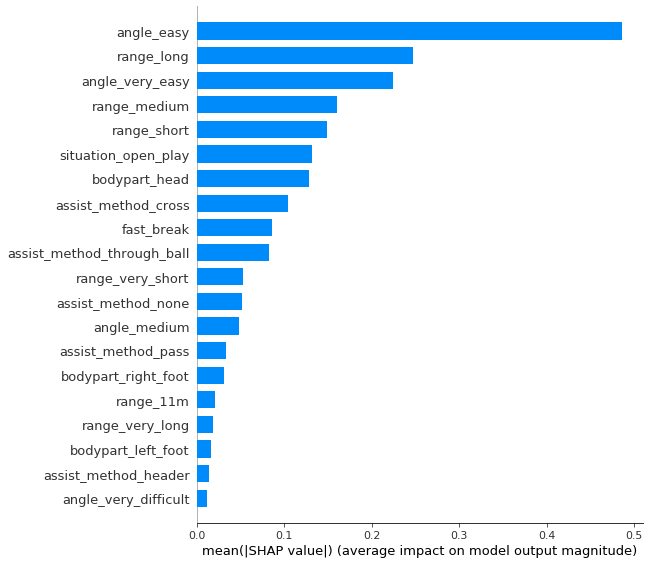

In [56]:
shapley = ShapWrapper(X_test, brain)
shapley.bar_summary_plot()

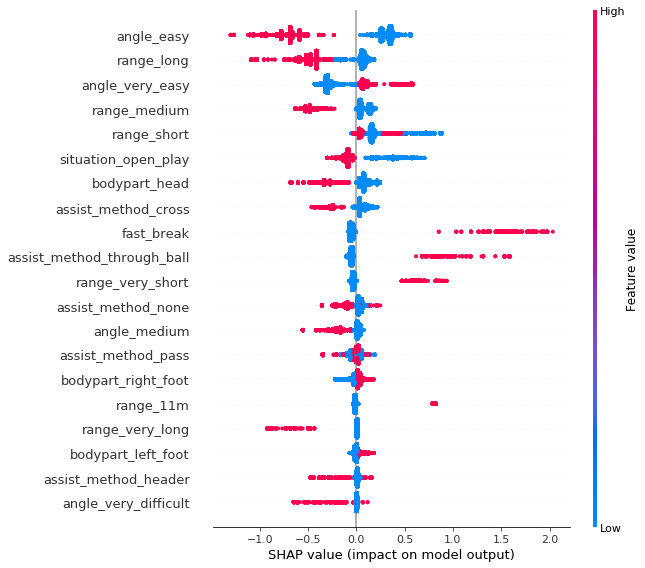

In [41]:
shapley.summary_plot()

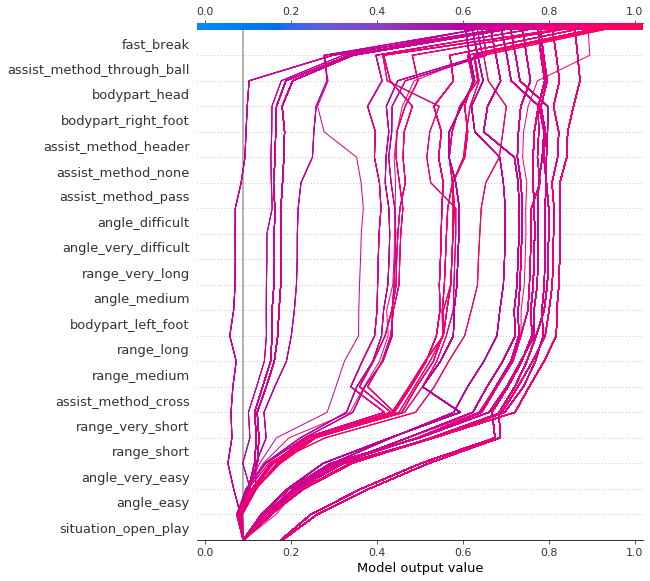

In [42]:
y_pred = brain.predict_proba(X_test)[:, 1]
T = X_test[y_pred >= 0.6]

shapley.decision_plot(T)

       fast_break  bodypart_head  ...  angle_very_difficult  angle_very_easy
47199           0              0  ...                     0                1

[1 rows x 21 columns]


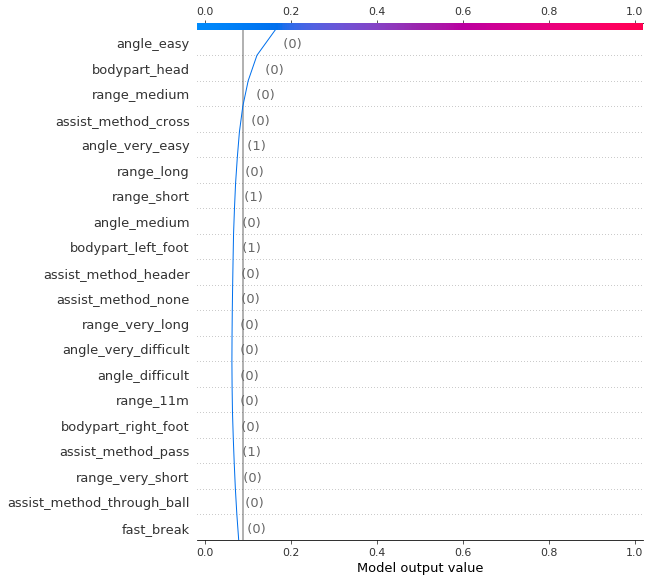

In [49]:
row = X_test.sample()
print(row)

shapley.decision_plot(row)

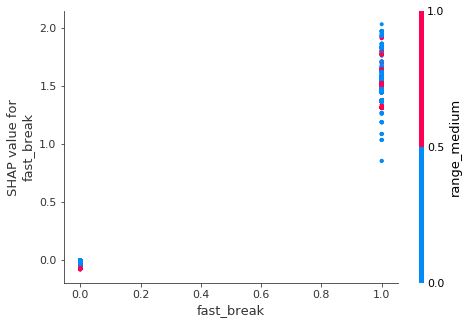

In [53]:
shapley.dependance_plot('fast_break')

       fast_break  bodypart_head  ...  angle_very_difficult  angle_very_easy
35444           0              0  ...                     0                0

[1 rows x 21 columns]


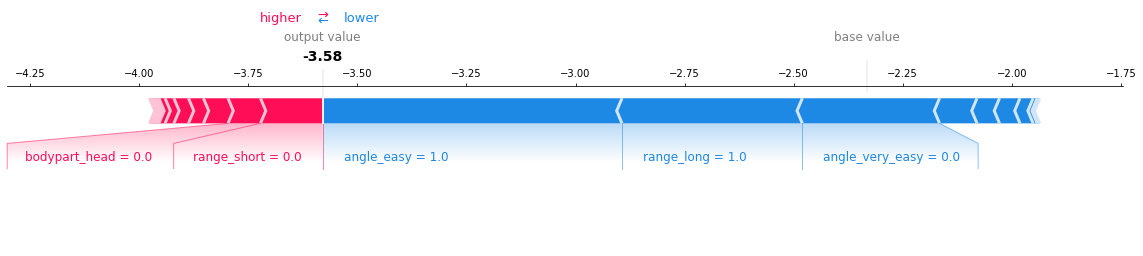

In [57]:
row = X_test.sample()
print(row)
shapley.force_plot(row)